$$\newcommand{\xv}{\mathbf{x}}
\newcommand{\Xv}{\mathbf{X}}
\newcommand{\yv}{\mathbf{y}}
\newcommand{\Yv}{\mathbf{Y}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\av}{\mathbf{a}}
\newcommand{\Wv}{\mathbf{W}}
\newcommand{\wv}{\mathbf{w}}
\newcommand{\gv}{\mathbf{g}}
\newcommand{\Hv}{\mathbf{H}}
\newcommand{\dv}{\mathbf{d}}
\newcommand{\Vv}{\mathbf{V}}
\newcommand{\vv}{\mathbf{v}}
\newcommand{\tv}{\mathbf{t}}
\newcommand{\Tv}{\mathbf{T}}
\newcommand{\Sv}{\mathbf{S}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\Zv}{\mathbf{Z}}
\newcommand{\Norm}{\mathcal{N}}
\newcommand{\muv}{\boldsymbol{\mu}}
\newcommand{\sigmav}{\boldsymbol{\sigma}}
\newcommand{\phiv}{\boldsymbol{\phi}}
\newcommand{\Phiv}{\boldsymbol{\Phi}}
\newcommand{\Sigmav}{\boldsymbol{\Sigma}}
\newcommand{\Lambdav}{\boldsymbol{\Lambda}}
\newcommand{\half}{\frac{1}{2}}
\newcommand{\argmax}[1]{\underset{#1}{\operatorname{argmax}}}
\newcommand{\argmin}[1]{\underset{#1}{\operatorname{argmin}}}
\newcommand{\dimensionbar}[1]{\underset{#1}{\operatorname{|}}}$$

# Introduction to Classification

The primary difference between regression and classification is the type of output.  In regression, the output is one or more continuous values (sometimes referred to as *targets*).  In classification, the outputs are class labels such as "default" or "no default".

## Logistic Regression

**Binary classification** is the simpliest form of classification.  In this type of problem, our job is to separate the data into one of two mutually exclusive classes.  For example, say we want to model whether a credit card holder will default on their monthly payment or not.  Our two output classes might be Y = 0 if no default and Y = 1 if default occurred.

To make this more real, let's take a look at the credit card default data at the UCI site.  The original data was pulled from: [https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients), downloaded locally, converted to a csv file and then upload to my github repo.

In [3]:
# Start with the standard incantations...
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#import csv
import pandas as pd
# Download the data directly from the UCI repo
# http://stackoverflow.com/questions/17063458/reading-an-excel-file-in-python-using-pandas
xls_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls"
cc_data = pd.read_excel(xls_url, sheetname='Data', header=[0, 1])
#cc_data.columns.values  # list of 2-tuples: good clue as to how to index into multiple headers...

# Download the csv version of data from either github repo or dropbox
#data_url = "https://raw.githubusercontent.com/MichaelSzczepaniak/MLToolbox/master/data/default%20of%20credit%20card%20clients.csv"
#data_url = "https://www.dropbox.com/s/9p9szqwsvi9q9gl/default%20of%20credit%20card%20clients.csv?dl=1"
#cc_data = pd.read_csv(data_url, dtype={'X12' : np.float32, 'Y' : np.float32}, header=[0, 1])

In [5]:
cc_data.loc[0:5, :]

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [6]:
#cc_data.loc[0:5, ['LIMIT_BAL', 'SEX', 'BILL_AMT1']]
#cc_data.loc[0:5, ['X1', 'X2', 'X12']]
# above 2 lines result in the following error:
# KeyError: 'MultiIndex Slicing requires the index to be fully lexsorted tuple len (1), lexsort depth (0)'

data = cc_data.loc[:, [('X12', 'BILL_AMT1'), ('Y', 'default payment next month')]]
data.loc[0:5, :]

,X12,Y
ID,BILL_AMT1,default payment next month
1,3913,1
2,2682,1
3,29239,0
4,46990,0
5,8617,0


From the [documentation](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients), we see that X12 is the latest billing amount (September 2005) and that Y indicates whether there was a default (Y = 1) or not (y = 0).  Let's start with a quick plot of these two variables.

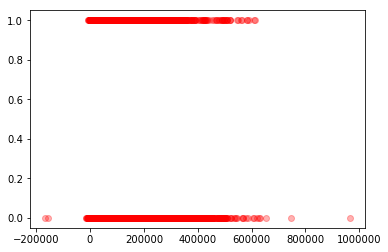

In [7]:
x = data.iloc[:, 0]
y = data.iloc[:, 1]
x = x.as_matrix()
y = y.as_matrix()
#type(x), type(y)

plt.plot(x, y, 'ro', alpha = 0.3)

We could fit a logistic regression model through this data, but since it is not very separable using the September billing amount ('X12', 'BILL_AMT1') variable, the performance would be poor.  Let's see if there are better variables to look at:

In [8]:
x_names = ['PAY_0', 'PAY_2', 'PAY_3', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
         'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3']

In [21]:
x_data = cc_data.iloc[:, [5,6,7,11,12,13,17,18,19]]
x_data = x_data.as_matrix()
y_data = cc_data.loc[:, ('Y', 'default payment next month')]
y_data = y_data.as_matrix()
x_data[0:3]

array([[    2,     2,    -1,  3913,  3102,   689,     0,   689,     0],
       [   -1,     2,     0,  2682,  1725,  2682,     0,  1000,  1000],
       [    0,     0,     0, 29239, 14027, 13559,  1518,  1500,  1000]], dtype=int64)

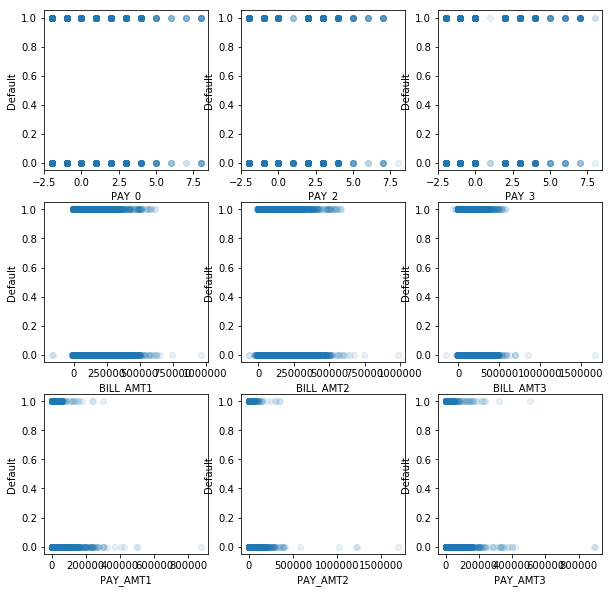

In [25]:
plt.figure(figsize=(10,10))
for c in range(x_data.shape[1]):
    plt.subplot(3,3, c+1)
    plt.plot(x_data[:, c], y_data, 'o', alpha=0.1)
    plt.xlabel(x_names[c])
    plt.ylabel('Default')

Nothings seems to be jumping out in terms of single variables.  What about a combination of variables?  How might we expect these variables to impact defaults?

Let's start by looking at whether the mean of each predictor for each of the classes is significantly different or not.  For example, is $X_{mean, Y=0}$ significantly different from $X_{mean, Y=1}$?

Instead of directly modeling which class a sample belongs to, logistic regression starts by modeling the probability $p(Y=1\:|\:\Xv)$.  In other words, we are modelling the probability that an n-dimensional sample $\Xv$ will be in the class $Y = 1$.